In [48]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
print('Shape of data is : ', data.shape)

Shape of data is :  (768, 9)


In [51]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
feature = 'Glucose'
X = data[[feature]]
Y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [55]:
model = LinearRegression()

In [56]:
model.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(x_test)

In [58]:
coefficients = model.coef_

rss = ((y_pred - y_test)**2).sum()
r2 = metrics.r2_score(y_test, y_pred)

print(f'Coefficients are : {coefficients}')
print(f'Residual sum of squares : {rss}')
print(f'R2 score is : {r2}')

Coefficients are : [0.00718135]
Residual sum of squares : 29.435018070876318
R2 score is : 0.1531864780655796


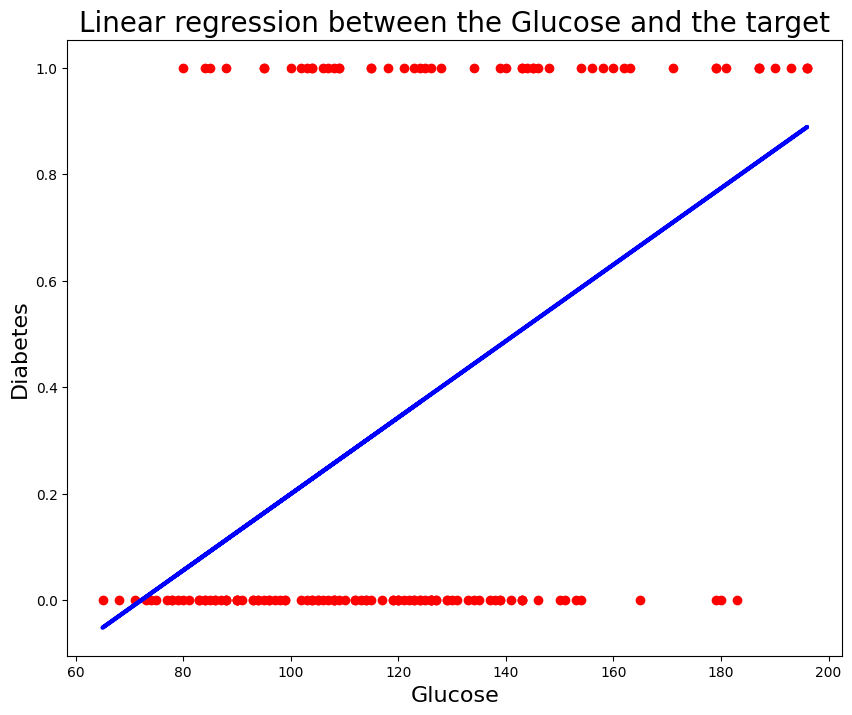

In [59]:
# plotting the regression line

plt.figure(figsize=(10, 8))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.title("Linear regression between the Glucose and the target", fontsize=20)
plt.xlabel("Glucose", fontsize=16)
plt.ylabel("Diabetes", fontsize=16)
plt.show()

In [62]:
X = data['Glucose']

m = 0
c = 0

L = 0.00001
epochs = 1000

n = float(len(X))
print('X shape is : ', X.shape)
print('Y shape is : ', Y.shape)

for i in range(epochs):
  Y_pred = m*X + c
  D_m = (-2/n) * sum(X * (Y - Y_pred))
  D_c = (-2/n) * sum(Y - Y_pred)

  m = m - L * D_m
  c = c - L * D_c

print(m, c)

X shape is :  (768,)
Y shape is :  (768,)
0.0031572136432453336 -0.0006183122586390487


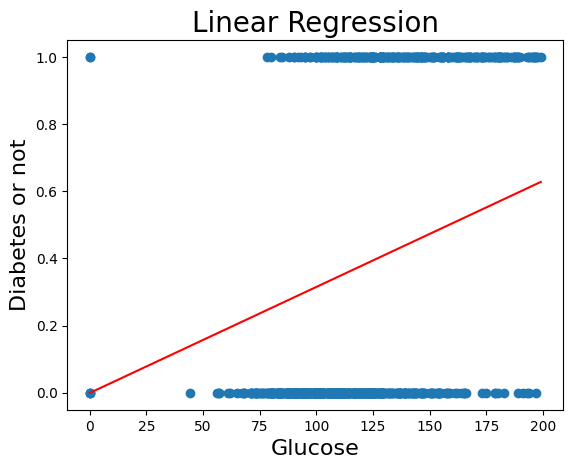

In [64]:
#   making predictions

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.title("Linear Regression", fontsize=20)
plt.xlabel("Glucose", fontsize=16)
plt.ylabel("Diabetes or not", fontsize=16)

plt.show()